# 超市销售数据分析

## 项目介绍
该项目旨在对超市销售数据进行深入分析，以发现销售趋势和顾客购买行为模式。数据包含不同产品类别、销售日期、客户信息和支付方式等字段。

通过本次分析，我们将：
- 计算不同产品类别的销售额。
- 分析销售的日趋势和月趋势。
- 识别顾客偏好的支付方式。
- 探索高峰销售时段和顾客的购买习惯。

本项目的分析结果可以帮助商家更好地理解销售数据，为库存管理、营销活动和产品规划提供数据支持。


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Sales_February_2023.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/23 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/23 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/23 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/23 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/23 20:32,"548 Lincoln St, Seattle, WA 98101"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          12004 non-null  object
 1   Product           12004 non-null  object
 2   Quantity Ordered  12004 non-null  object
 3   Price Each        12004 non-null  object
 4   Order Date        12004 non-null  object
 5   Purchase Address  12004 non-null  object
dtypes: object(6)
memory usage: 564.3+ KB


In [8]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,12004,12004,12004,12004,12004,12004
unique,11508,20,8,19,9627,11316
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,18,1514,10863,1514,18,18


In [9]:
print(df.isnull().sum())

Order ID            32
Product             32
Quantity Ordered    32
Price Each          32
Order Date          32
Purchase Address    32
dtype: int64


In [10]:
df=df.dropna()

In [11]:
print(df.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [12]:
total_sales = df['Sales'].sum()

KeyError: 'Sales'

In [13]:
# 创建 'Sales' 列
df['Sales'] = df['Quantity Ordered'].astype(float) * df['Price Each'].astype(float)

# 计算总销售额
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)

ValueError: could not convert string to float: 'Quantity Ordered'

In [14]:
# 将无法转换为数值的值设为 NaN
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# 删除包含 NaN 的行
df = df.dropna(subset=['Quantity Ordered', 'Price Each'])

# 创建 'Sales' 列
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# 计算总销售额
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 2203481.2399999998


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8780\183300646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8780\183300646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8780\183300646.py:9: SettingWithCopyWarning: 
A value is trying to be set 

In [15]:
# 将无法转换为数值的值设为 NaN
df.loc[:, 'Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df.loc[:, 'Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# 删除包含 NaN 的行
df = df.dropna(subset=['Quantity Ordered', 'Price Each'])

# 创建 'Sales' 列
df.loc[:, 'Sales'] = df['Quantity Ordered'] * df['Price Each']

# 计算总销售额
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)


Total Sales: 2203481.2399999998


In [16]:
average_sales = df['Sales'].mean()

In [17]:
average_sales

np.float64(183.83791423327213)

In [19]:
sales_by_category = df.groupby('product_Category')['Sales'].sum()

KeyError: 'product_Category'

In [20]:
print(df.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales'],
      dtype='object')


In [21]:
sales_by_category = df.groupby('Product')['Sales'].sum()
print(sales_by_category)

Product
20in Monitor                   27057.54
27in 4K Gaming Monitor        166915.72
27in FHD Monitor               71245.25
34in Ultrawide Monitor        158835.82
AA Batteries (4-pack)           6666.24
AAA Batteries (4-pack)          5905.25
Apple Airpods Headphones      151950.00
Bose SoundSport Headphones     84391.56
Flatscreen TV                  94200.00
Google Phone                  228600.00
LG Dryer                       22800.00
LG Washing Machine             24000.00
Lightning Charging Cable       22380.15
Macbook Pro Laptop            467500.00
ThinkPad Laptop               276997.23
USB-C Charging Cable           19765.30
Vareebadd Phone                51600.00
Wired Headphones               15371.18
iPhone                        307300.00
Name: Sales, dtype: float64


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

KeyError: 'Date'

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8780\506715213.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [24]:
print(df.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales'],
      dtype='object')


In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%Y", errors='coerce')

In [27]:
daily_sales = df.groupby(df['Order Date'].dt.date)['Sales'].sum()

In [28]:
daily_sales

Order Date
2023-02-01    70008.65
2023-02-02    77893.74
2023-02-03    72971.05
2023-02-04    70260.00
2023-02-05    76124.54
2023-02-06    86290.90
2023-02-07    74316.68
2023-02-08    94507.13
2023-02-09    87770.12
2023-02-10    76934.51
2023-02-11    75116.02
2023-02-12    81070.51
2023-02-13    92570.14
2023-02-14    71620.69
2023-02-15    75581.65
2023-02-16    87786.35
2023-02-17    84481.74
2023-02-18    80362.52
2023-02-19    75558.98
2023-02-20    75050.82
2023-02-21    80969.31
2023-02-22    82520.99
2023-02-23    65925.80
2023-02-24    74934.91
2023-02-25    71061.15
2023-02-26    80006.81
2023-02-27    90377.62
2023-02-28    68200.41
2023-03-01     3207.50
Name: Sales, dtype: float64

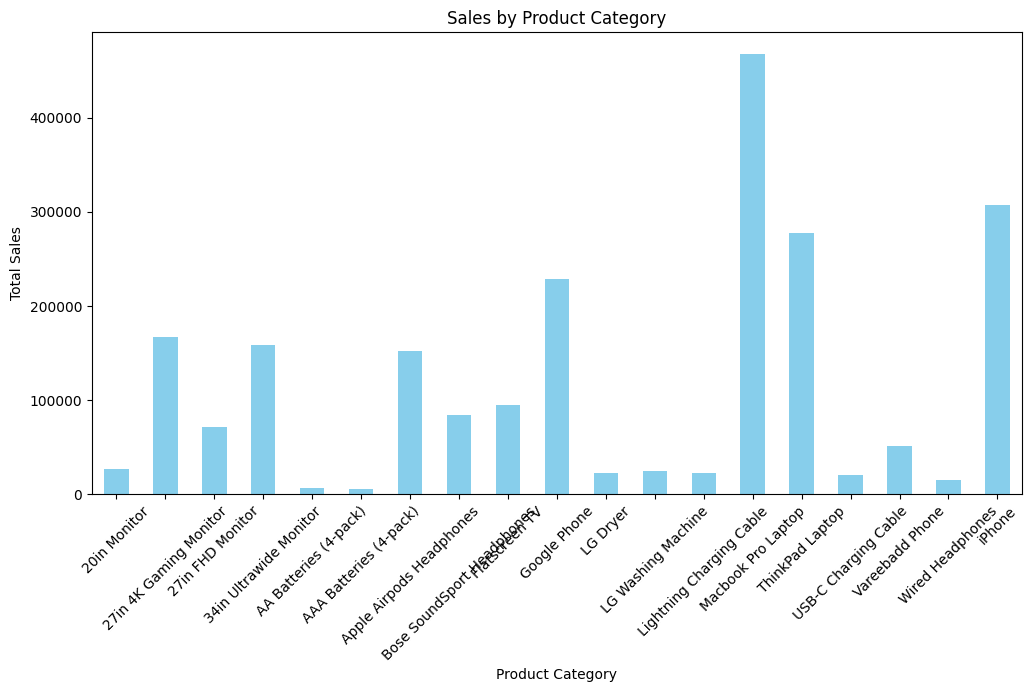

In [36]:
plt.figure(figsize=(12, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

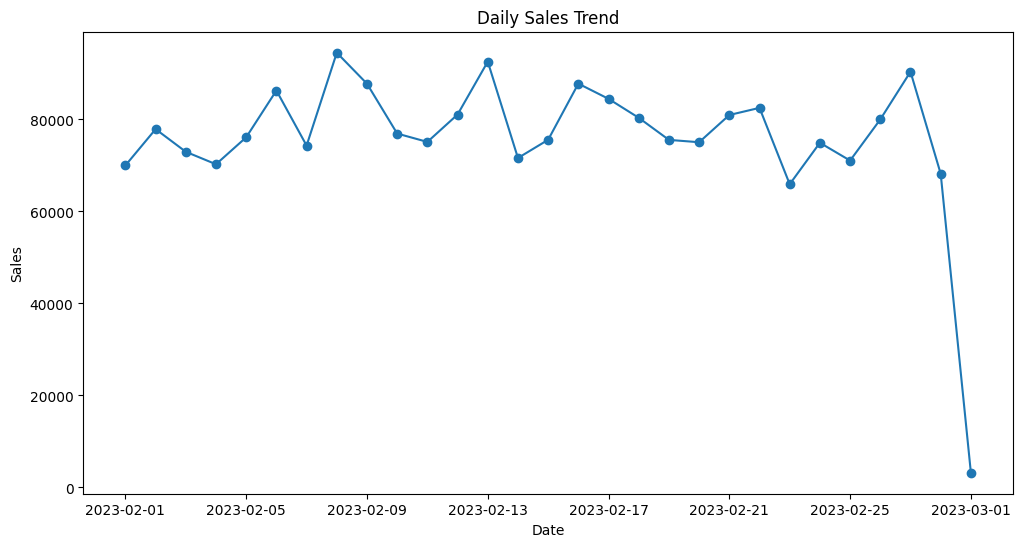

In [40]:
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [41]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
